In [1]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("merge_dataset.csv", sep="\t")
df.drop(columns=[
    "Miasto", 
    "URL",
    "Pietro", 
    "formatted_address",
    "result_confidence",
    "suburb",
    "building_category",
    "result_type",
    "Dataset"
], inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(x_train.corr(), vmax=1, center=0, fmt='.2f', square=True, linewidths=.5, cmap='coolwarm', annot=True)
ax.set_ylim(len(x_train.columns))
plt.xticks(rotation = 90, fontsize=8)
plt.show()

In [5]:
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
binary_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
categorical_encoder = OneHotEncoder(drop="first")

categorical_pipeline = Pipeline(
    steps=[
        ("imputer", categorical_imputer),
        ("encoder", categorical_encoder)
    ]
)
binary_pipeline = binary_imputer
numeric_pipeline = numeric_imputer

preprocessing = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, make_column_selector(dtype_include=float)),
        ("cat", categorical_pipeline, make_column_selector(dtype_include=object)),
        ("bin", binary_pipeline, make_column_selector(dtype_include=int))
    ]
)

In [7]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
preprocessor = preprocessing.fit(train.iloc[:, 1:])
num_features = list(preprocessing.named_transformers_["num"].feature_names_in_)
cat_features = list(preprocessing.named_transformers_["cat"].steps[1][1].get_feature_names_out())
bin_features = list(preprocessing.named_transformers_["bin"].feature_names_in_)
features = num_features + cat_features + bin_features

In [18]:
train_preprocessed = pd.DataFrame(preprocessor.transform(train.iloc[:, 1:]), columns=features)
y_train = train.iloc[:, 0]
test_preprocessed = pd.DataFrame(preprocessor.transform(test.iloc[:, 1:]), columns=features)
y_test = test.iloc[:, 0]

### Baseline models

In [21]:
model = RandomForestRegressor().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

0.9709568644794733
15392872912.928804
0.8847413742426191
58959989250.79811


In [ ]:
y_pred = model.predict(x_test_preprocessed)
y = pd.DataFrame(y_test)
y["pred"] = y_pred.tolist()
y.head(10)

In [22]:
model = GradientBoostingRegressor().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

0.8321571174934219
88956791801.53972
0.7832107128432371
110897505123.44983


In [ ]:
model = LinearRegression().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

In [ ]:
model = Lasso().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

In [ ]:
model = BayesianRidge().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

In [ ]:
model = SVR().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

### Outlier detection and data scaling

In [47]:
df = pd.read_csv("merge_dataset.csv", sep="\t")
df.drop(columns=[
    "Miasto", 
    "URL",
    "Pietro", 
    "formatted_address",
    "result_confidence",
    "suburb",
    "building_category",
    "result_type",
    "Dataset"
], inplace=True)

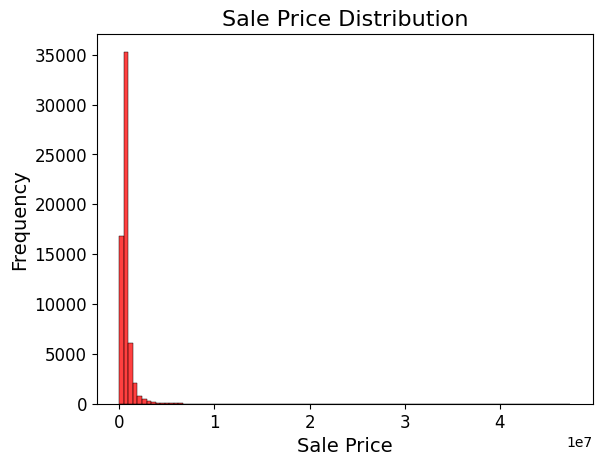

In [48]:
sns.histplot(df['Cena'], color = 'r', bins=100)
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [49]:
df = df[(df["Cena"]>250000)&(df["Cena"]<4000000)]

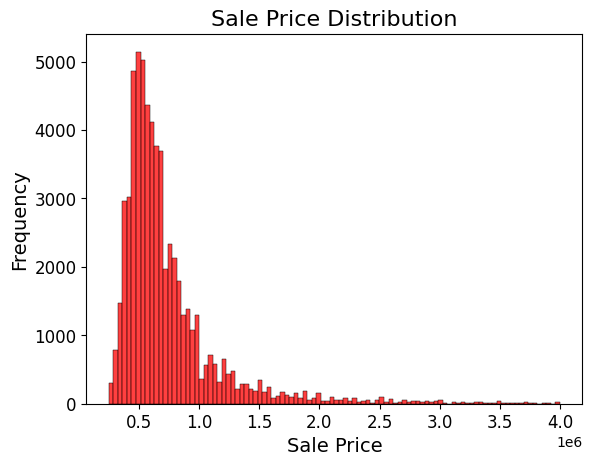

In [50]:
sns.histplot(df['Cena'], color = 'r', bins=100)
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

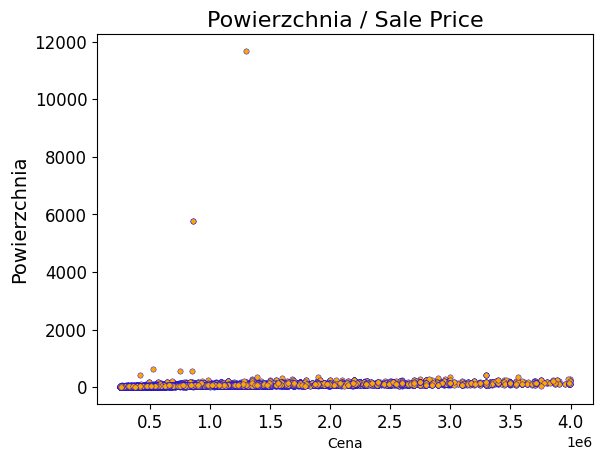

In [51]:
sns.scatterplot(data=df, x="Cena", y="Powierzchnia", color = 'orange', edgecolor = 'b', s = 15)
plt.title('{} / Sale Price'.format("Powierzchnia"), fontsize = 16)
# plt.xlabel('{}'.format(i[0]), fontsize = 14)
plt.ylabel('Powierzchnia', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.savefig('scatter1.png')
plt.show()

In [52]:
df = df[(df["Powierzchnia"]<300)]

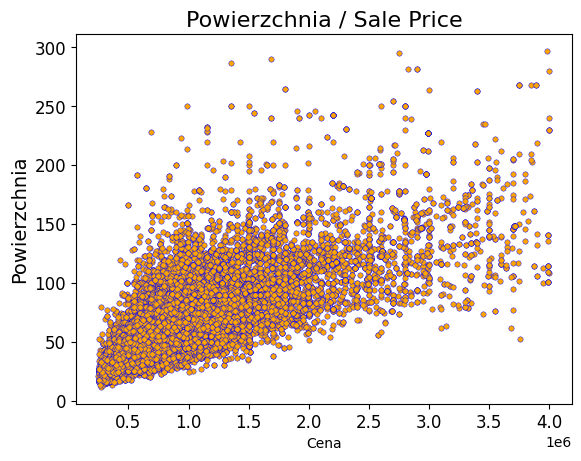

In [53]:
sns.scatterplot(data=df, x="Cena", y="Powierzchnia", color = 'orange', edgecolor = 'b', s = 15)
plt.title('{} / Sale Price'.format("Powierzchnia"), fontsize = 16)
# plt.xlabel('{}'.format(i[0]), fontsize = 14)
plt.ylabel('Powierzchnia', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.savefig('scatter1.png')
plt.show()

In [54]:
train_outlier = train.copy()
test_outlier = test.copy()
train_outlier = train_outlier[(train_outlier["Cena"]>250000)&(train_outlier["Cena"]<4000000)]
test_outlier = test_outlier[(test_outlier["Cena"]>250000)&(test_outlier["Cena"]<4000000)]
train_outlier = train_outlier[(train_outlier["Powierzchnia"]<300)]
test_outlier = test_outlier[(test_outlier["Powierzchnia"]<300)]

In [55]:
preprocessor = preprocessing.fit(train_outlier.iloc[:, 1:])
num_features = list(preprocessing.named_transformers_["num"].feature_names_in_)
cat_features = list(preprocessing.named_transformers_["cat"].steps[1][1].get_feature_names_out())
bin_features = list(preprocessing.named_transformers_["bin"].feature_names_in_)
features = num_features + cat_features + bin_features

In [56]:
train_preprocessed = pd.DataFrame(preprocessor.transform(train_outlier.iloc[:, 1:]), columns=features)
y_train = train_outlier.iloc[:, 0]
test_preprocessed = pd.DataFrame(preprocessor.transform(test_outlier.iloc[:, 1:]), columns=features)
y_test = test_outlier.iloc[:, 0]

In [57]:
model = RandomForestRegressor().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

0.9843216294625425
3014742589.657589
0.8913893807515317
22131234164.817505


In [58]:
model = GradientBoostingRegressor().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

0.7826959648831803
41784682152.13933
0.7755994709838511
45725369109.663345


In [59]:
model = LinearRegression().fit(train_preprocessed, y_train)
r2 = r2_score(y_train, model.predict(train_preprocessed))
mse = mean_squared_error(y_train, model.predict(train_preprocessed))
print(r2)
print(mse)
r2 = r2_score(y_test, model.predict(test_preprocessed))
mse = mean_squared_error(y_test, model.predict(test_preprocessed))
print(r2)
print(mse)

0.6072708824499294
75516597470.90306
0.6187167656031486
77692849943.62762


In [ ]:
selector = RFE(RandomForestRegressor(), n_features_to_select=5, step=1)
selector = selector.fit(train_preprocessed, y_train)

In [60]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression
import numpy as np

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(train_preprocessed, y_train)
print(fit.scores_)
dfscores = pd.DataFrame(np.around(fit.scores_, 2))
dfcolumns = pd.DataFrame(train_preprocessed.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  
featureScores.head(100)

[6.17833120e+04 5.71049754e+03 8.51766823e+00 1.45332044e-06
 1.71833473e+02 1.41164081e+02 1.50730156e+03 5.71602538e+02
 2.55969523e+01 1.75992994e+02 6.92281222e+01 2.50036676e+02
 3.55409205e+02 1.49437833e+01 2.57173502e+02]
                     Specs    Score
0             Powierzchnia 61783.31
1             Liczba pokoi  5710.50
6                longitude  1507.30
7        pietro mieszkania   571.60
12               x1_wtorny   355.41
14      Miejsce parkingowe   257.17
11      x0_do zamieszkania   250.04
9     polozenie mieszkania   175.99
4                    Winda   171.83
5                 latitude   141.16
10       x0_do wykonczenia    69.23
8        maksymalne pietro    25.60
13  Powierzchnia dodatkowa    14.94
2                   Czynsz     8.52
3               Rok budowy     0.00


,Specs,Score
0,Powierzchnia,61783.31
1,Liczba pokoi,5710.50
2,Czynsz,8.52
3,Rok budowy,0.00
4,Winda,171.83
5,latitude,141.16
6,longitude,1507.30
7,pietro mieszkania,571.60
8,maksymalne pietro,25.60
9,polozenie mieszkania,175.99


In [ ]:
t_suma = pd.qcut(df['Cena'], 10, retbins=True, duplicates='drop')[1]  
t_suma

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df["Cena"], test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    "estimator__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "esitmator__splitter": ["best", "random", "absolute_error", "poisson"],
    "esitmator__max_depth": [3, 6, 9, 15, 25, 35, 50, 100],
    "esitmator__min_samples_split": [2, 4, 6, 8, 10, 15, 25],
}

In [ ]:
estimator = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    cv=5,
    n_jobs=5,
    random_state=5
)

In [ ]:
estimator.fit(x_train, y_train)